## INFO 6105 - Data Science 

# US WildFire Causes and Analysis


### Introduction

- A wildfire is an unplanned, unwanted, uncontrolled fire in an area of combustible vegetation starting in rural areas and urban areas. Depending on the type of vegetation present, a wildfire can also be classified more specifically as a forest fire, brush fire, bushfire (in Australia), desert fire, grass fire, hill fire, peat fire, prairie fire, vegetation fire, or ve
- In this project, I will show you how to analyze the dataset, visualize the data and implement various Machine Learning Algorithms to classify the causes of wildfires. The whole model will take the fire part of this dataset and provide percentage ratings for all possible reasons that could cause wildfires.!

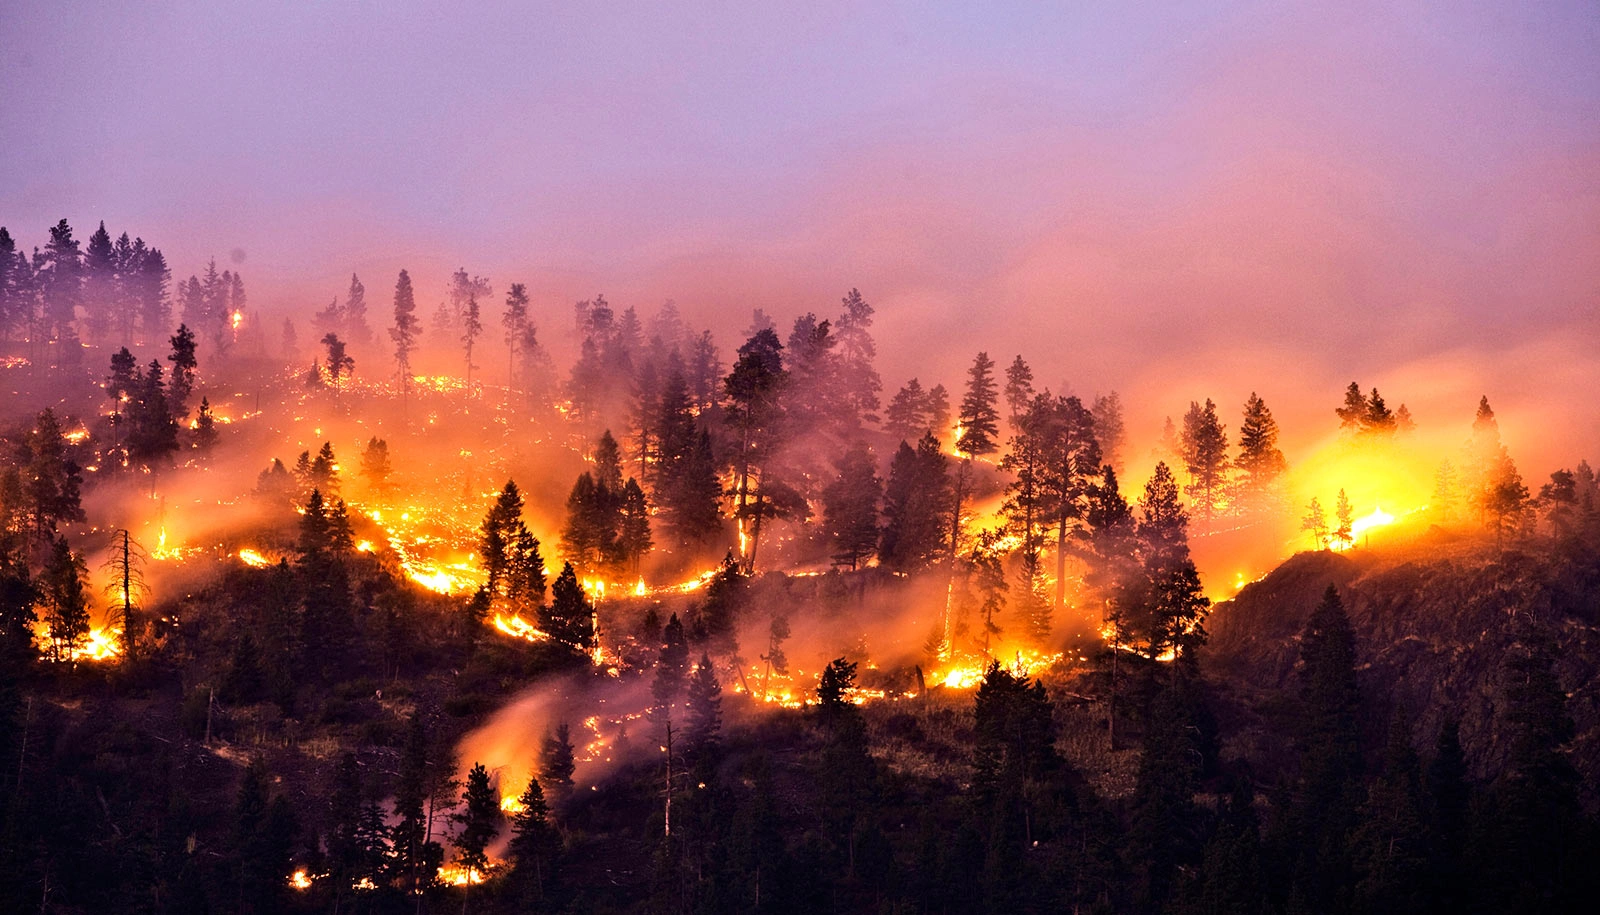

## Importing essential libraries

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
import statsmodels.api as sm
from scipy import stats
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ske
from sklearn import preprocessing

## Importing US Wildfires dataset
- Data Source: https://www.kaggle.com/rtatman/188-million-us-wildfires

In [2]:
conn = sqlite3.connect('/Users/rutuja/Downloads/FPA_FOD_20170508 (1).sqlite')
data = pd.read_sql(
                       """
                       
                        SELECT *
                        from fires 
                        
                       """, con=conn)

In [3]:
data.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [4]:
df = pd.read_sql_query("SELECT Fire_Code,fire_name,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,FIRE_SIZE_CLASS FROM 'Fires'", conn)
print(data.head())

   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE_CLASS  \
0                  0511     Plumas National Forest  ...    

## Reading and Pre-processing Data
- 1 I have selected some of the data which is useful (Fire Year, State, Fire_Size, Longitude, Latitude, Day of the week, Month fields etc as a parameter)

In [5]:
print("Head:")
print(df.head())

Head:
  FIRE_CODE FIRE_NAME  FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  \
0      BJ8K  FOUNTAIN       2005    Miscellaneous  40.036944 -121.005833   
1      AAC0    PIGEON       2004        Lightning  38.933056 -120.404444   
2      A32W     SLACK       2004   Debris Burning  38.984167 -120.735556   
3      None      DEER       2004        Lightning  38.559167 -119.913333   
4      None  STEVENOT       2004        Lightning  38.559167 -119.933056   

  STATE  FIRE_SIZE FIRE_SIZE_CLASS  
0    CA       0.10               A  
1    CA       0.25               A  
2    CA       0.10               A  
3    CA       0.10               A  
4    CA       0.10               A  


In [6]:
print("Shape:")
df.shape

Shape:


(1880465, 9)

In [7]:
df.info


<bound method DataFrame.info of         FIRE_CODE                  FIRE_NAME  FIRE_YEAR   STAT_CAUSE_DESCR  \
0            BJ8K                   FOUNTAIN       2005      Miscellaneous   
1            AAC0                     PIGEON       2004          Lightning   
2            A32W                      SLACK       2004     Debris Burning   
3            None                       DEER       2004          Lightning   
4            None                   STEVENOT       2004          Lightning   
...           ...                        ...        ...                ...   
1880460      None                   ODESSA 2       2015  Missing/Undefined   
1880461      None                       None       2015      Miscellaneous   
1880462      None                       None       2015  Missing/Undefined   
1880463      None                       None       2015  Missing/Undefined   
1880464      None  BARKER BL  BIG_BEAR_LAKE_       2015      Miscellaneous   

          LATITUDE   LONGITUDE 

# Identify null values


In [8]:
print("Null Variables:\n")
null= df.isna().sum().sort_values(ascending=False)
print (null)

Null Variables:

FIRE_CODE           1555636
FIRE_NAME            957189
FIRE_YEAR                 0
STAT_CAUSE_DESCR          0
LATITUDE                  0
LONGITUDE                 0
STATE                     0
FIRE_SIZE                 0
FIRE_SIZE_CLASS           0
dtype: int64


### transferred the date format to Julian date for better understanding.

In [9]:
df['DISCOVER_DATE'] = pd.to_datetime(data['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(df.head())

  FIRE_CODE FIRE_NAME  FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  \
0      BJ8K  FOUNTAIN       2005    Miscellaneous  40.036944 -121.005833   
1      AAC0    PIGEON       2004        Lightning  38.933056 -120.404444   
2      A32W     SLACK       2004   Debris Burning  38.984167 -120.735556   
3      None      DEER       2004        Lightning  38.559167 -119.913333   
4      None  STEVENOT       2004        Lightning  38.559167 -119.933056   

  STATE  FIRE_SIZE FIRE_SIZE_CLASS DISCOVER_DATE  
0    CA       0.10               A    2005-02-02  
1    CA       0.25               A    2004-05-12  
2    CA       0.10               A    2004-05-31  
3    CA       0.10               A    2004-06-28  
4    CA       0.10               A    2004-06-28  


In [10]:
df['CONTROL_DATE'] = pd.to_datetime(data['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(df.head())

  FIRE_CODE FIRE_NAME  FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  \
0      BJ8K  FOUNTAIN       2005    Miscellaneous  40.036944 -121.005833   
1      AAC0    PIGEON       2004        Lightning  38.933056 -120.404444   
2      A32W     SLACK       2004   Debris Burning  38.984167 -120.735556   
3      None      DEER       2004        Lightning  38.559167 -119.913333   
4      None  STEVENOT       2004        Lightning  38.559167 -119.933056   

  STATE  FIRE_SIZE FIRE_SIZE_CLASS DISCOVER_DATE CONTROL_DATE  
0    CA       0.10               A    2005-02-02   2005-02-02  
1    CA       0.25               A    2004-05-12   2004-05-12  
2    CA       0.10               A    2004-05-31   2004-05-31  
3    CA       0.10               A    2004-06-28   2004-07-03  
4    CA       0.10               A    2004-06-28   2004-07-03  


# Visulization

## 1. Number of Wildfires per year 
- Wildfires per year increase over a period of time?
- So, we mainly need fire year column and we need to count the number of fires per year. Also, sorting it in ascending order.




In [11]:
df['FIRE_YEAR'].value_counts().sort_index()


1992     67975
1993     61989
1994     75955
1995     71472
1996     75574
1997     61450
1998     68370
1999     89363
2000     96416
2001     86587
2002     75656
2003     68261
2004     69279
2005     88604
2006    114004
2007     95573
2008     85378
2009     78325
2010     79889
2011     90552
2012     72769
2013     64780
2014     67753
2015     74491
Name: FIRE_YEAR, dtype: int64

Plotting this data

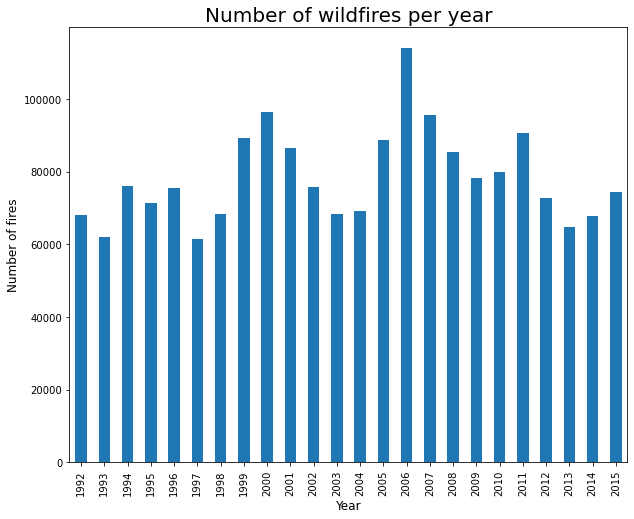

In [12]:
df['FIRE_YEAR'].value_counts().sort_index().plot(kind = 'bar',\
                                       figsize = (10, 8));
plt.xlabel('Year', fontsize = 12);
plt.ylabel('Number of fires', fontsize = 12);
plt.title('Number of wildfires per year', fontsize=20);

Here I have created chart of fires per year. 
- In 2006 maximum incidents of wildfires took place 
- Around 10,000 - 15,000 incidents of wildfire take place every year.

## 2. Number of fires for each class per year.

In [13]:
fires_grouped_by_Fireclass = data.groupby('FIRE_SIZE_CLASS').size()
fires_grouped_by_Fireclass

FIRE_SIZE_CLASS
A    666919
B    939376
C    220077
D     28427
E     14107
F      7786
G      3773
dtype: int64

#### Analyse the wildfire occurrences based on fire size class.

We have FIRE_SIZE_CLASS column

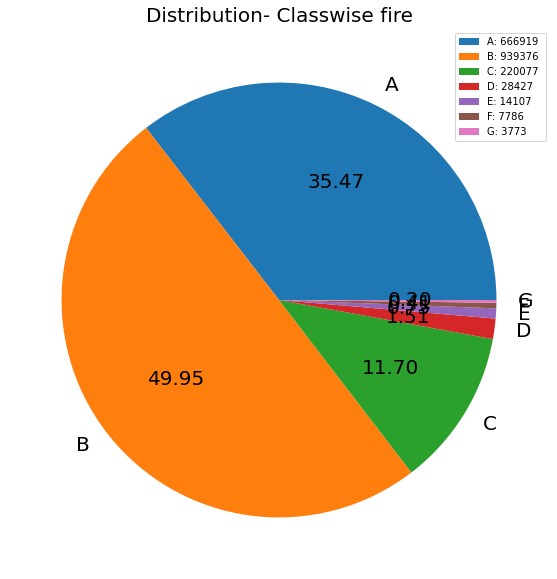

In [14]:
fires_grouped_by_Fireclass.plot(kind = 'pie', \
                                autopct='%1.2f',\
                                    label = '',\
                                    figsize = (10, 10),\
                                    fontsize = (20) \
                                
                                     );
labels=['A: 666919 ', 'B: 939376 ', 'C: 220077 ', 'D: 28427 ', 'E: 14107 ', 'F: 7786 ', 'G: 3773 ']
plt.legend(labels, loc='upper right');
plt.title('Distribution- Classwise fire', fontsize=20);

In [15]:
fires_peryear_byclass = data.groupby(['FIRE_YEAR', 'FIRE_SIZE_CLASS'])\
                             .size().reset_index()\
                             .rename(columns={0:'NUMBER_OF_FIRES'})
fires_peryear_byclass

,FIRE_YEAR,FIRE_SIZE_CLASS,NUMBER_OF_FIRES
0,1992,A,25540
1,1992,B,32981
2,1992,C,7955
3,1992,D,876
4,1992,E,368
...,...,...,...
163,2015,C,7720
164,2015,D,1098
165,2015,E,568
166,2015,F,336


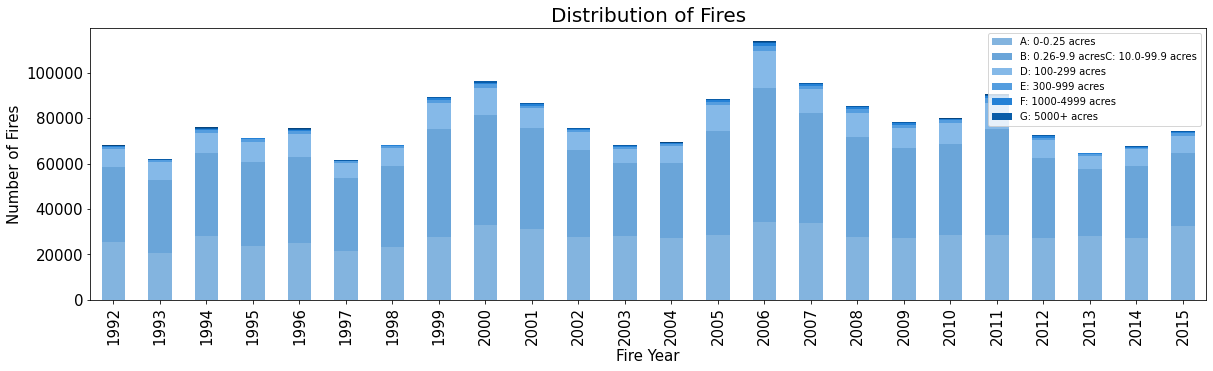

In [16]:
pivot_df = fires_peryear_byclass.pivot(index='FIRE_YEAR', columns='FIRE_SIZE_CLASS',values='NUMBER_OF_FIRES')

colors = ["#83B4DF","#6AA5D9","#85B9E8", "#549DDF","#2481D6", "#095CA8", "#07457E"]

pivot_df.loc[:,['A','B','C','D', 'E', 'F', 'G']].plot.bar(stacked=True, color=colors, figsize=(20,5), fontsize=15);
plt.xlabel("Fire Year", fontsize = 15);
plt.ylabel("Number of Fires", fontsize = 15);
labels=['A: 0-0.25 acres', 'B: 0.26-9.9 acres''C: 10.0-99.9 acres', 'D: 100-299 acres', 'E: 300-999 acres', 'F: 1000-4999 acres', 'G: 5000+ acres']
plt.legend(labels, loc='upper right');
plt.title('Distribution of Fires', fontsize=20);

## 3. Top Three States in The Number of Wildfires

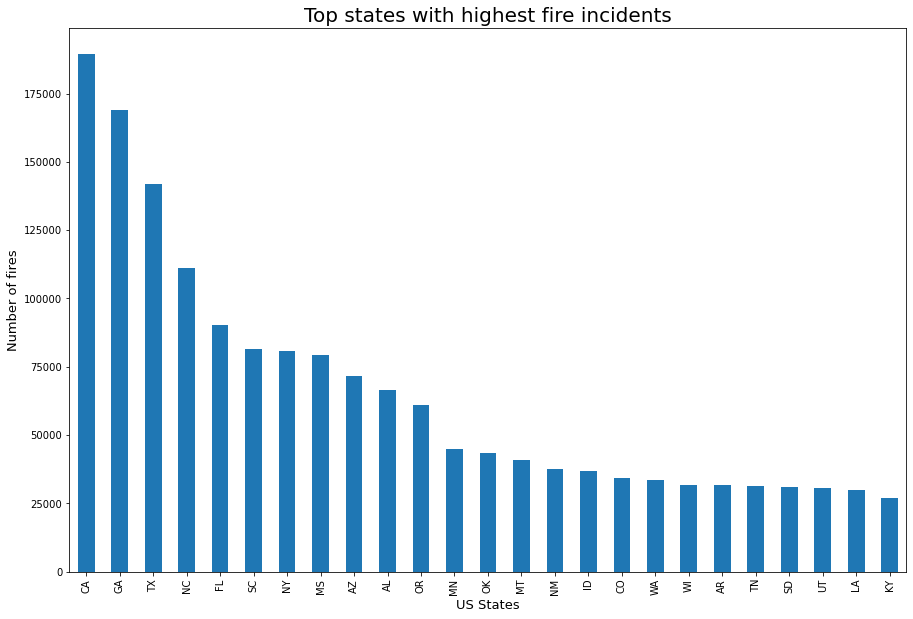

In [17]:
fires_bystate = data['STATE'].value_counts().head(25)
fires_bystate.plot(x = 'STATE', kind = 'bar',\
                   figsize=(15, 10), fontsize=10);
plt.title('Top states with highest fire incidents', fontsize=20);
plt.xlabel("US States", fontsize = 13);
plt.ylabel ("Number of fires", fontsize = 13);

#### Conclusion:
Interpretation:- CA, GA, TX , NC, FL, SC, NY, MS, AZ are more susptible to fire.

# 4. Different causes of Wildfire

In [18]:
df.STAT_CAUSE_DESCR.unique()

array(['Miscellaneous', 'Lightning', 'Debris Burning', 'Campfire',
       'Equipment Use', 'Arson', 'Children', 'Railroad', 'Smoking',
       'Powerline', 'Structure', 'Fireworks', 'Missing/Undefined'],
      dtype=object)

### Number of Wildfires with Causes in California

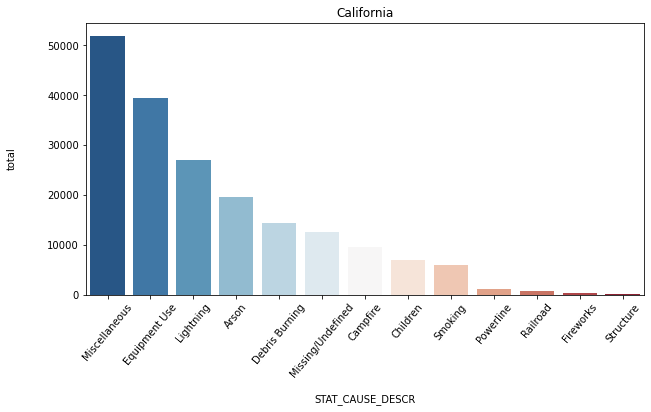

In [19]:
df_CA = pd.read_sql_query("SELECT count(STAT_CAUSE_DESCR)as total,STAT_CAUSE_DESCR FROM 'Fires' where STATE='CA' group by STAT_CAUSE_DESCR order by total desc", conn)

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='STAT_CAUSE_DESCR', y='total', data=df_CA, palette='RdBu_r')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
plt.xticks(rotation=50)
plt.title('California')
plt.show()

### Number of Wildfires with Causes in Texas

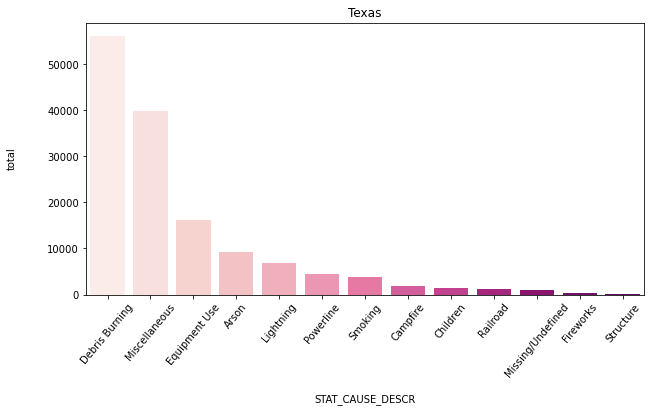

In [20]:
df_TX = pd.read_sql_query("SELECT count(STAT_CAUSE_DESCR)as total,STAT_CAUSE_DESCR FROM 'Fires' where STATE='TX' group by STAT_CAUSE_DESCR order by total desc", conn)

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='STAT_CAUSE_DESCR', y='total', data=df_TX, palette='RdPu')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
plt.xticks(rotation=50)
plt.title('Texas')
plt.show()

### Number of Wildfires with Causes in Georgia

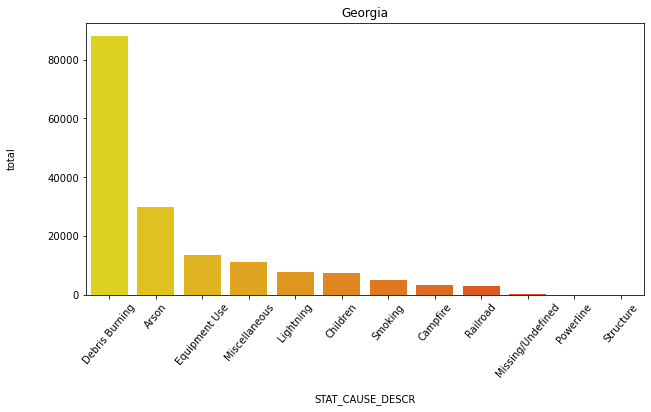

In [21]:
df_GA = pd.read_sql_query("SELECT count(STAT_CAUSE_DESCR)as total,STAT_CAUSE_DESCR FROM 'Fires' where STATE='GA' group by STAT_CAUSE_DESCR order by total desc", conn)

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='STAT_CAUSE_DESCR', y='total', data=df_GA, palette='autumn_r')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
plt.xticks(rotation=50)
plt.title('Georgia')
plt.show()

Most of the wild fire is initiated due to some or the other human activity. There is a less chance of natural cause for wildfire

In [22]:
df['STAT_CAUSE_DESCR'].value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

Here, its is very difficlut to understand the cuases of wildfire so I have decided to implement the various algorithms to predict the causes of wildfires.

### Preprocessing

In [23]:
fire_data = df.copy()

In [24]:
#Coverting the states and causes to numeric numbers.

le = preprocessing.LabelEncoder()
fire_data['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
fire_data['STATE'] = le.fit_transform(df['STATE'])

In [25]:
fire_data.head()

,FIRE_CODE,FIRE_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,DISCOVER_DATE,CONTROL_DATE
0,BJ8K,FOUNTAIN,2005,7,40.036944,-121.005833,4,0.10,A,2005-02-02,2005-02-02
1,AAC0,PIGEON,2004,6,38.933056,-120.404444,4,0.25,A,2004-05-12,2004-05-12
2,A32W,SLACK,2004,3,38.984167,-120.735556,4,0.10,A,2004-05-31,2004-05-31
3,None,DEER,2004,6,38.559167,-119.913333,4,0.10,A,2004-06-28,2004-07-03
4,None,STEVENOT,2004,6,38.559167,-119.933056,4,0.10,A,2004-06-28,2004-07-03


In [26]:
fire_data.corr()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE
FIRE_YEAR,1.000000,0.050389,0.000407,0.015863,0.102115,0.007048
STAT_CAUSE_DESCR,0.050389,1.000000,0.012729,-0.123879,0.036004,0.010450
LATITUDE,0.000407,0.012729,1.000000,-0.354727,0.152474,0.038860
LONGITUDE,0.015863,-0.123879,-0.354727,1.000000,0.207575,-0.039731
STATE,0.102115,0.036004,0.152474,0.207575,1.000000,-0.008003
FIRE_SIZE,0.007048,0.010450,0.038860,-0.039731,-0.008003,1.000000


<AxesSubplot:>

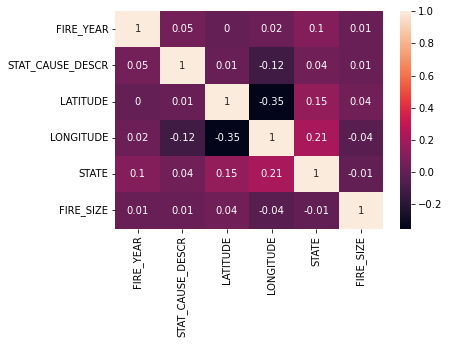

In [27]:
# tried to calculate the correlations but found out the dataset didn’t show a strong correlation. 
# The next step was to implement some algorithms to analyze the data.  

correlation_matrix = fire_data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [28]:
dataset = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE FROM 'Fires'", conn)

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset['STAT_CAUSE_DESCR'] = le.fit_transform(data['STAT_CAUSE_DESCR'])
dataset['STATE'] = le.fit_transform(data['STATE'])
print(dataset.head())

   FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  FIRE_SIZE
0       2005                 7  40.036944 -121.005833      4       0.10
1       2004                 6  38.933056 -120.404444      4       0.25
2       2004                 3  38.984167 -120.735556      4       0.10
3       2004                 6  38.559167 -119.913333      4       0.10
4       2004                 6  38.559167 -119.933056      4       0.10


In [30]:
dataset['DATE'] = pd.to_datetime(data['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
dataset['MONTH'] = pd.DatetimeIndex(data['DISCOVERY_DATE']).month
dataset=dataset.dropna()
dataset

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DATE,MONTH
0,2005,7,40.036944,-121.005833,4,0.10,2005-02-02,1
1,2004,6,38.933056,-120.404444,4,0.25,2004-05-12,1
2,2004,3,38.984167,-120.735556,4,0.10,2004-05-31,1
3,2004,6,38.559167,-119.913333,4,0.10,2004-06-28,1
4,2004,6,38.559167,-119.933056,4,0.10,2004-06-28,1
...,...,...,...,...,...,...,...,...
1880460,2015,8,40.481637,-122.389375,4,0.01,2015-09-26,1
1880461,2015,7,37.617619,-120.938570,4,0.20,2015-10-05,1
1880462,2015,8,37.617619,-120.938570,4,0.10,2015-05-02,1
1880463,2015,8,37.672235,-120.898356,4,2.00,2015-10-14,1


In [31]:
test=dataset.drop("DATE",axis=1)
test=test.dropna()
test

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,MONTH
0,2005,7,40.036944,-121.005833,4,0.10,1
1,2004,6,38.933056,-120.404444,4,0.25,1
2,2004,3,38.984167,-120.735556,4,0.10,1
3,2004,6,38.559167,-119.913333,4,0.10,1
4,2004,6,38.559167,-119.933056,4,0.10,1
...,...,...,...,...,...,...,...
1880460,2015,8,40.481637,-122.389375,4,0.01,1
1880461,2015,7,37.617619,-120.938570,4,0.20,1
1880462,2015,8,37.617619,-120.938570,4,0.10,1
1880463,2015,8,37.672235,-120.898356,4,2.00,1


In [32]:
# Create new dataframes with and without 'STAT_CAUSE_DESCR'
X=test.drop(['STAT_CAUSE_DESCR'],axis=1).values
y=test['STAT_CAUSE_DESCR'].values

In [33]:
X=X[:,np.newaxis,2]
X.shape

(1880465, 1)

In [34]:
# Perform a train/test split on the data
# Training Set
X_train = X[:-20]
y_train = y[:-20]

In [35]:
# Testing Set
X_test = X[-20:]
y_test = y[-20:]

# Building Machine Learning Model to predict the causes of US Wildfires!

# 1. Gaussian Naive Bayes

In [36]:
# Initialize Gaussian from SkLearn
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [37]:
# Fit the model on the X_train and y_train data
X=test.drop(['STAT_CAUSE_DESCR'],axis=1).values
y=test['STAT_CAUSE_DESCR'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
predicted_result=nb_classifier.predict(X_test)

In [38]:
print(classification_report(y_test,predicted_result))

/Users/rutuja/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.25      0.00      0.00     84170
           1       0.00      0.00      0.00     22818
           2       0.03      0.07      0.04     18240
           3       0.26      0.93      0.41    129099
           4       0.32      0.00      0.01     44329
           5       0.03      0.06      0.04      3415
           6       0.50      0.02      0.04     83316
           7       0.21      0.07      0.10     97026
           8       0.75      0.20      0.31     50300
           9       0.00      0.00      0.00      4289
          10       0.00      0.00      0.00     10053
          11       0.00      0.00      0.00     15925
          12       0.00      0.00      0.00      1160

    accuracy                           0.25    564140
   macro avg       0.18      0.10      0.07    564140
weighted avg       0.30      0.25      0.15    564140



/Users/rutuja/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rutuja/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I have imported the Gaussian Naive Bayes model, created a Gaussian Classifier, trained the model and predicted the response for the test dataset. We finally came to an accuracy of around 25%. which wasn’t what we wanted. Let’s go to the next one. 

# Decision Tree

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g., whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

Listed out some of the data required, transferred some data to numeric numbers.

In [39]:
dt= pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires'", conn)

In [40]:
dt['DATE'] = pd.to_datetime(data['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [41]:
dt['MONTH'] = pd.DatetimeIndex(dt['DATE']).month
dt['DAY_OF_WEEK'] = dt['DATE'].dt.day_name()
dt_orig = dt.copy()
dt_CA = dt[dt['STATE'] == 'CA']
dt_GA = dt[dt['STATE'] == 'GA']
dt_TX = dt[dt['STATE'] == 'TX']
dt

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,DATE,MONTH,DAY_OF_WEEK
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10,2005-02-02,2,Wednesday
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25,2004-05-12,5,Wednesday
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10,2004-05-31,5,Monday
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10,2004-06-28,6,Monday
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10,2004-06-28,6,Monday
...,...,...,...,...,...,...,...,...,...,...
1880460,2015,Missing/Undefined,40.481637,-122.389375,CA,2457291.5,0.01,2015-09-26,9,Saturday
1880461,2015,Miscellaneous,37.617619,-120.938570,CA,2457300.5,0.20,2015-10-05,10,Monday
1880462,2015,Missing/Undefined,37.617619,-120.938570,CA,2457144.5,0.10,2015-05-02,5,Saturday
1880463,2015,Missing/Undefined,37.672235,-120.898356,CA,2457309.5,2.00,2015-10-14,10,Wednesday


In [42]:
dt['STAT_CAUSE_DESCR'] = le.fit_transform(dt['STAT_CAUSE_DESCR'])
dt['STATE'] = le.fit_transform(dt['STATE'])
dt['DAY_OF_WEEK'] = le.fit_transform(dt['DAY_OF_WEEK'])
print(dt.head())

   FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  \
0       2005                 7  40.036944 -121.005833      4       2453403.5   
1       2004                 6  38.933056 -120.404444      4       2453137.5   
2       2004                 3  38.984167 -120.735556      4       2453156.5   
3       2004                 6  38.559167 -119.913333      4       2453184.5   
4       2004                 6  38.559167 -119.933056      4       2453184.5   

   FIRE_SIZE       DATE  MONTH  DAY_OF_WEEK  
0       0.10 2005-02-02      2            6  
1       0.25 2004-05-12      5            6  
2       0.10 2004-05-31      5            1  
3       0.10 2004-06-28      6            1  
4       0.10 2004-06-28      6            1  


In [43]:
dt = dt.drop('DATE',axis=1)
dt = dt.dropna()

In [44]:
X = dt.drop(['STAT_CAUSE_DESCR'], axis=1).values
y = dt['STAT_CAUSE_DESCR'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) 

In [46]:
d_tree=DecisionTreeClassifier(max_depth=2,random_state=0)

In [47]:
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [48]:
dt_tree=DecisionTreeClassifier(max_depth=2,random_state=0)

In [49]:
dt_tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=0)

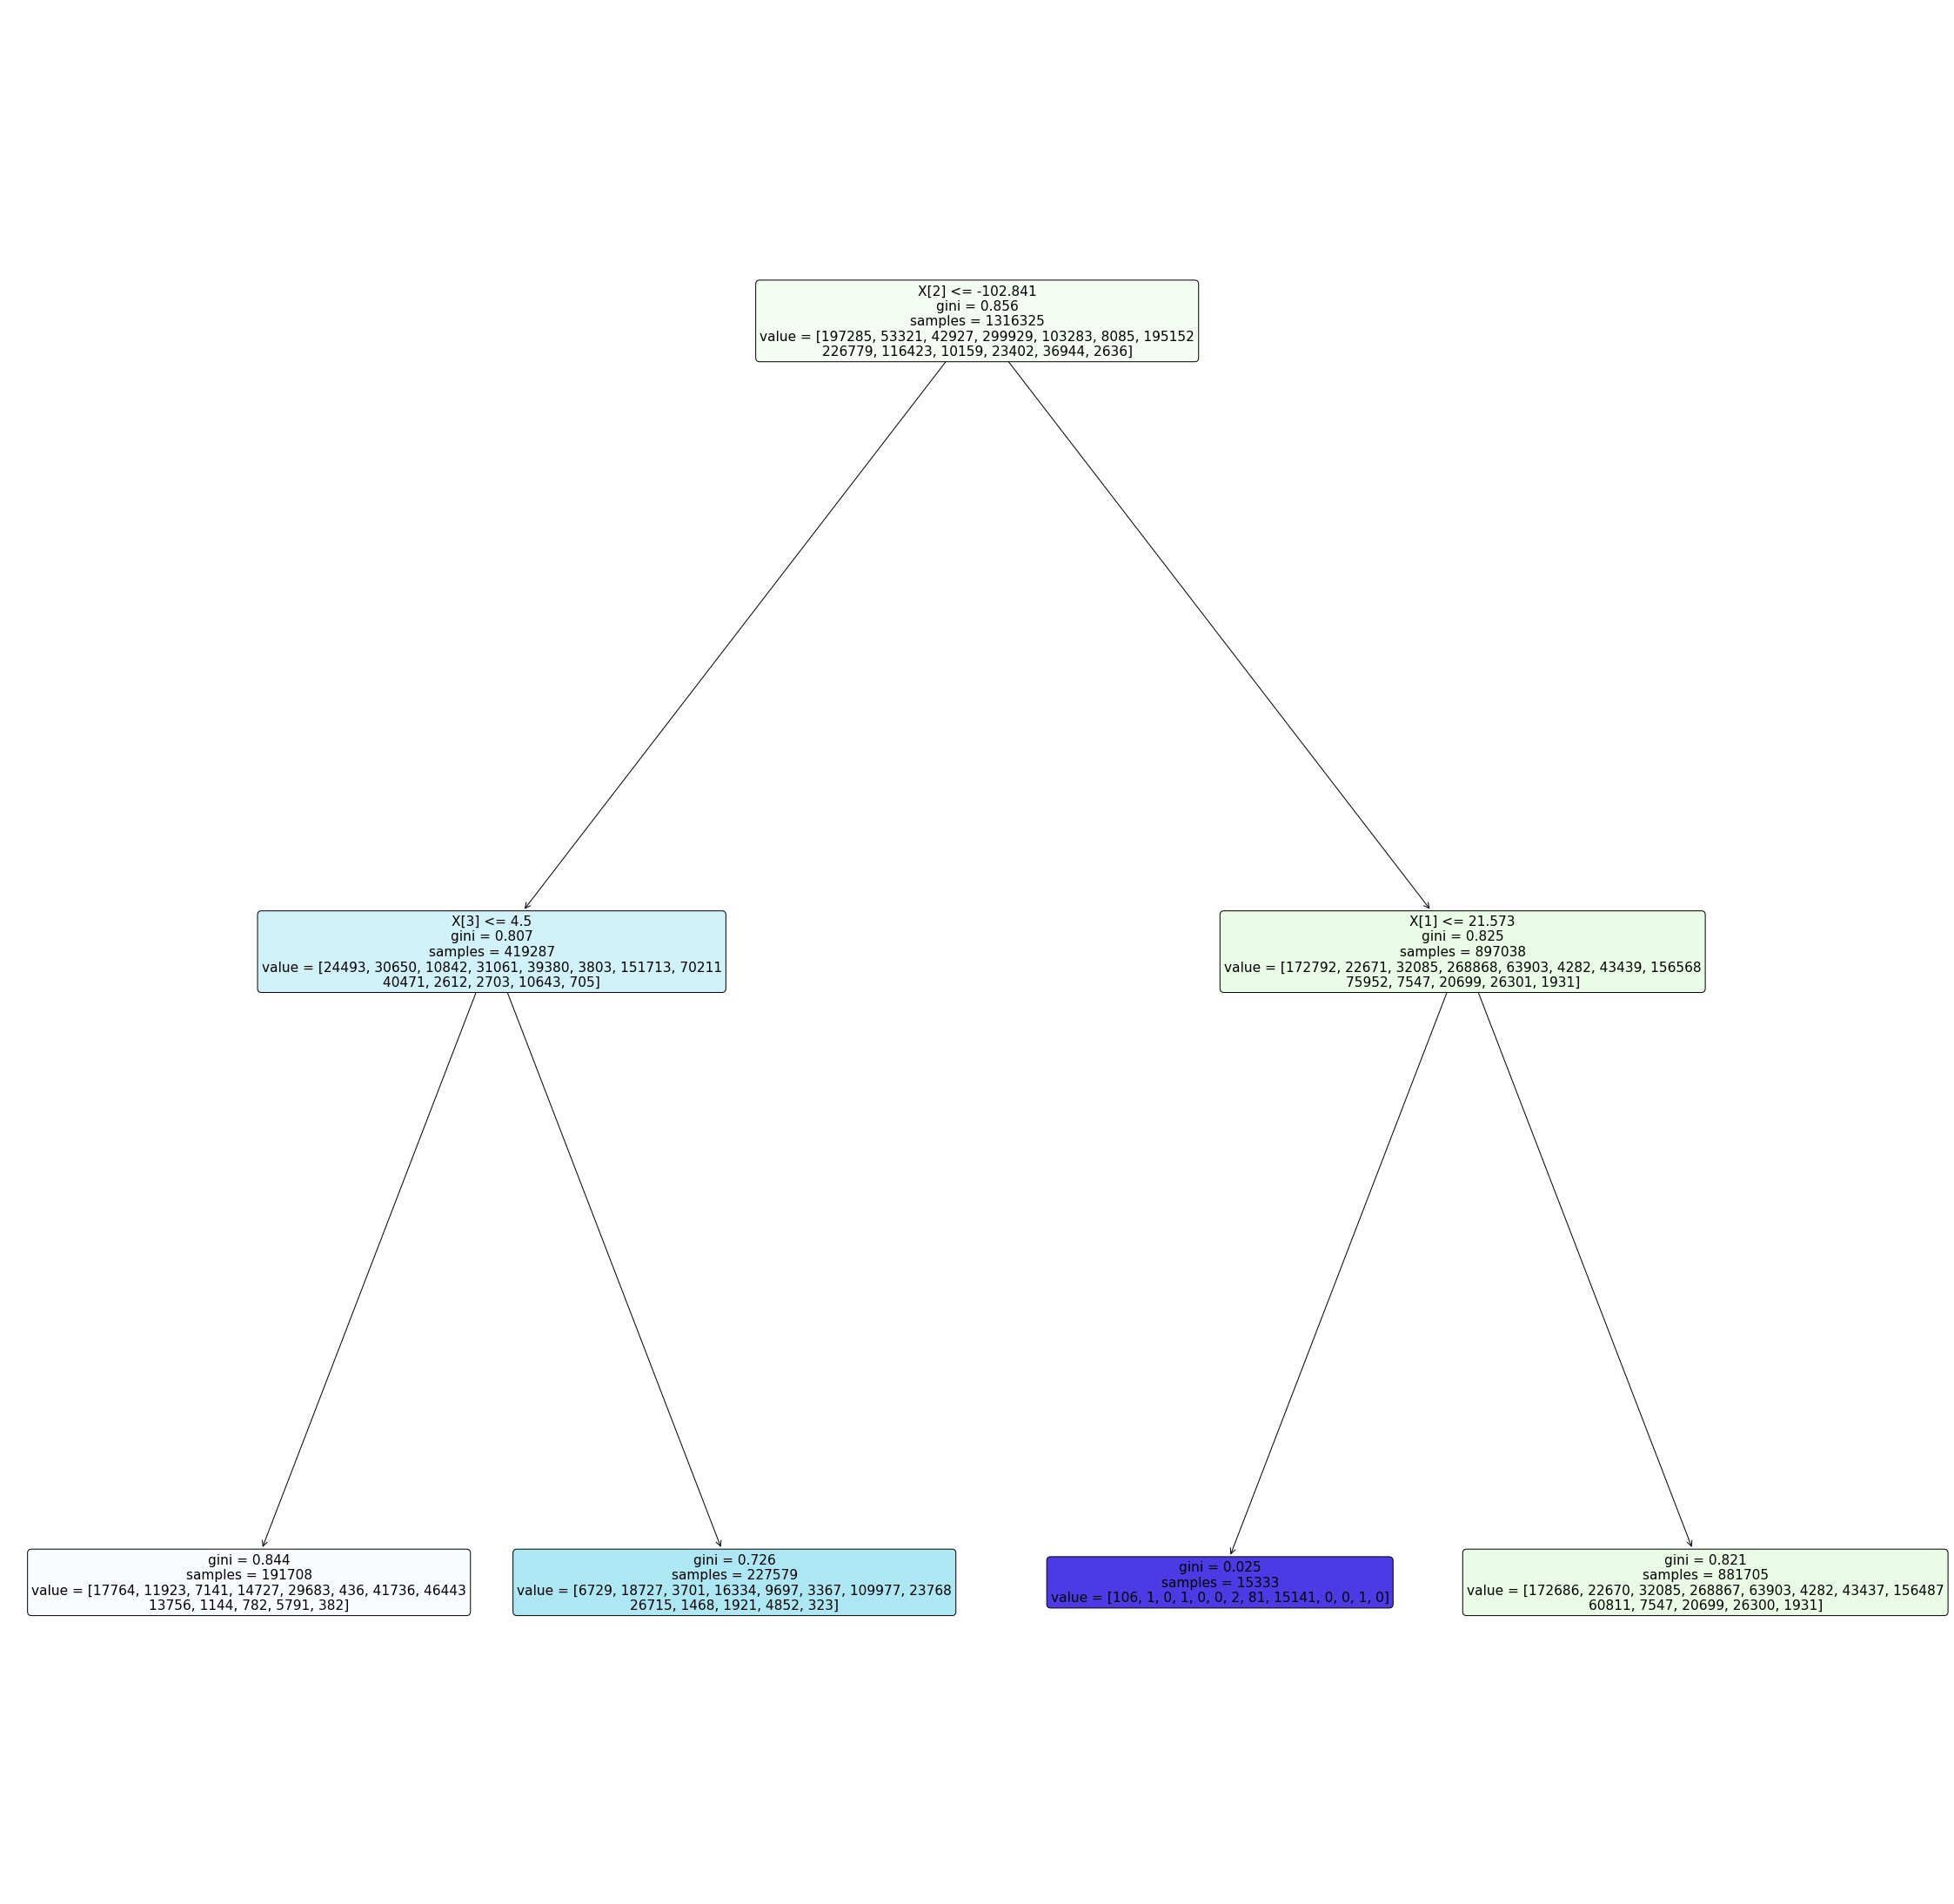

In [50]:
plt.figure(figsize = (40,40))
tree.plot_tree(dt_tree, filled=True, rounded = True);


In [51]:
dt_tree.predict(X_test[0:10])

array([3, 6, 7, 6, 3, 3, 3, 3, 7, 3])

In [52]:
#decision tree socre
score=dt_tree.score(X_test,y_test)
score

0.3342042755344418

the trained the data came out with a score of 33%. It still wasn’t what we want, so we had to turn to last algorithm: random forest. 

# Random forest

In [53]:
rf_classifier = ske.RandomForestClassifier(n_estimators=50)
rf_classifier = rf_classifier.fit(X_train, y_train)
print(rf_classifier.score(X_test,y_test))

0.5795192682667423


The 57.89% score was much better than before. We wanted to focus a bit more on fire causes, so we split the causes into 4 classes: natural, accidental, malicious and other. 

In [54]:
def set_label(fire_cause):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if fire_cause in natural:
        cause = 1
    elif fire_cause in accidental:
        cause = 2
    elif fire_cause in malicious:
        cause = 3
    else:
        cause = 4
    return cause
     

dt['LABEL'] = dt_orig['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x))
dt = dt.drop('STAT_CAUSE_DESCR',axis=1)
print(dt.head())

   FIRE_YEAR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  FIRE_SIZE  MONTH  \
0       2005  40.036944 -121.005833      4       2453403.5       0.10      2   
1       2004  38.933056 -120.404444      4       2453137.5       0.25      5   
2       2004  38.984167 -120.735556      4       2453156.5       0.10      5   
3       2004  38.559167 -119.913333      4       2453184.5       0.10      6   
4       2004  38.559167 -119.933056      4       2453184.5       0.10      6   

   DAY_OF_WEEK  LABEL  
0            6      4  
1            6      1  
2            1      2  
3            1      1  
4            1      1  


four classes of wildifre reasons

In [55]:
#random forest test based on the new dataset gave a 70% score.
X = dt.drop(['LABEL'], axis=1).values
y = dt['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
rf_classifier = ske.RandomForestClassifier(n_estimators=50)
rf_classifier = rf_classifier.fit(X_train, y_train)
print(rf_classifier.score(X_test,y_test))

0.7016981600311979


In [56]:
from sklearn.metrics import confusion_matrix
y_pred = rf_classifier.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

[[ 67979  10246    843   4248]
 [ 10242 200219  16919  21948]
 [  1489  36322  38702   7657]
 [  6673  46636   5231  88786]]


In [57]:
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.6919948948842486

Text(0.5, 1.0, 'Accuracy Score: 0.6919948948842486')

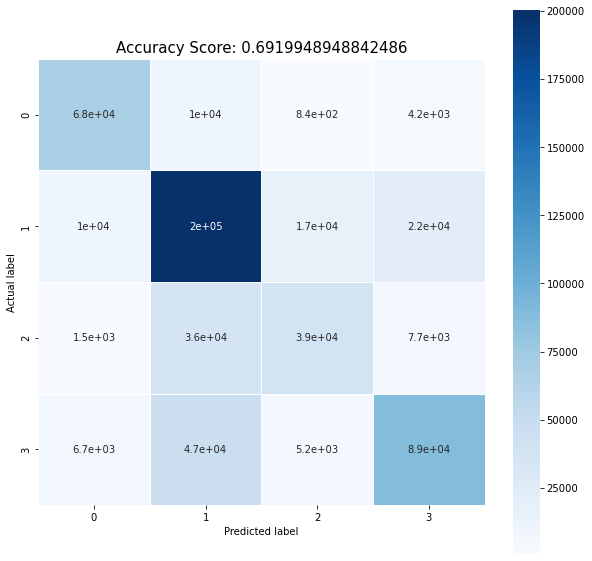

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rf_classifier.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

#### Cross-validation of the ML model- Random Forest Classifier

To find the ML model is overfitted, under fitted or generalize doing cross-validation.

In [59]:
accuracies = cross_val_score(estimator = rf_classifier, X = X_train, y = y_train, cv =10)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:2f}%" .format(accuracies.std()*100))

Accuracy : 69.05 %
Standard Deviation: 0.120147%


The mean accuracy value of cross-validation is 69.05% and Random Forest classifier accuracy is 69.19%. It showing Random Forest Classifier is Perfect fit but when training data will more it will generalized model.

The first two labels, natural and accidental, worked well with around 80%. In a word, we could predict the cause of these wildfires, to an accuracy of 58% or better. Reducing the number of labels improved the prediction score to 70% while using random forest.
Our next step was to see if we could predict malicious fires in one state. We chose the top 3 states of wildfires: CA, GA and TX.

# Predict malicious fires in CA, TX, GA 

### CA

In [60]:
dt_CA.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,DATE,MONTH,DAY_OF_WEEK
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10,2005-02-02,2,Wednesday
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25,2004-05-12,5,Wednesday
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10,2004-05-31,5,Monday
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10,2004-06-28,6,Monday
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10,2004-06-28,6,Monday


drop  DATE and STAT_CAUSE_DESCR, beacuse we only focus on one State, we need to drop STATE field too. Also we should drop Fire_Size.


In [61]:
def set_arson_label(cause):
    arson = 0
    if cause == 'Arson':
        arson = 1
    return arson
     

dt_CA['ARSON'] = dt_CA['STAT_CAUSE_DESCR'].apply(lambda x: set_arson_label(x)) 
dt_CA.head()

/var/folders/sm/gtxbjv7s4svcx2l17hq0mj_80000gn/T/ipykernel_95334/4137478984.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_CA['ARSON'] = dt_CA['STAT_CAUSE_DESCR'].apply(lambda x: set_arson_label(x))


,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,DATE,MONTH,DAY_OF_WEEK,ARSON
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10,2005-02-02,2,Wednesday,0
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25,2004-05-12,5,Wednesday,0
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10,2004-05-31,5,Monday,0
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10,2004-06-28,6,Monday,0
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10,2004-06-28,6,Monday,0


In [62]:
dt_CA = dt_CA.drop('DATE',axis=1)
dt_CA = dt_CA.drop('STATE',axis=1)
dt_CA = dt_CA.drop('STAT_CAUSE_DESCR',axis=1)
dt_CA = dt_CA.drop('FIRE_SIZE',axis=1)
dt_CA = dt_CA.dropna()

le = preprocessing.LabelEncoder()
dt_CA['DAY_OF_WEEK'] = le.fit_transform(dt_CA['DAY_OF_WEEK'])

print(dt_CA.head())

   FIRE_YEAR   LATITUDE   LONGITUDE  DISCOVERY_DATE  MONTH  DAY_OF_WEEK  ARSON
0       2005  40.036944 -121.005833       2453403.5      2            6      0
1       2004  38.933056 -120.404444       2453137.5      5            6      0
2       2004  38.984167 -120.735556       2453156.5      5            1      0
3       2004  38.559167 -119.913333       2453184.5      6            1      0
4       2004  38.559167 -119.933056       2453184.5      6            1      0


In [63]:
X = dt_CA.drop(['ARSON'], axis=1).values
y = dt_CA['ARSON'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
rf_classifier = ske.RandomForestClassifier(n_estimators=200)
rf_classifier = rf_classifier.fit(X_train, y_train)
print(rf_classifier.score(X_test,y_test))

0.92151587092236


### GA

In [64]:
dt_GA['ARSON'] = dt_GA['STAT_CAUSE_DESCR'].apply(lambda x: set_arson_label(x)) 
dt_GA = dt_GA.drop('DATE',axis=1)
dt_GA = dt_GA.drop('STATE',axis=1)
dt_GA = dt_GA.drop('STAT_CAUSE_DESCR',axis=1)
dt_GA = dt_GA.drop('FIRE_SIZE',axis=1)
dt_GA = dt_GA.dropna()

le = preprocessing.LabelEncoder()
dt_GA['DAY_OF_WEEK'] = le.fit_transform(dt_GA['DAY_OF_WEEK'])

/var/folders/sm/gtxbjv7s4svcx2l17hq0mj_80000gn/T/ipykernel_95334/171620351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_GA['ARSON'] = dt_GA['STAT_CAUSE_DESCR'].apply(lambda x: set_arson_label(x))


In [65]:
X = dt_GA.drop(['ARSON'], axis=1).values
y = dt_GA['ARSON'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
rf_classifier= ske.RandomForestClassifier(n_estimators=200)
rf_classifier = rf_classifier.fit(X_train, y_train)

In [66]:
print(rf_classifier.score(X_test,y_test))

0.8574840607173171


### TX

In [67]:
dt_TX['ARSON'] = dt_TX['STAT_CAUSE_DESCR'].apply(lambda x: set_arson_label(x)) 
dt_TX = dt_TX.drop('DATE',axis=1)
dt_TX = dt_TX.drop('STATE',axis=1)
dt_TX = dt_TX.drop('STAT_CAUSE_DESCR',axis=1)
dt_TX = dt_TX.drop('FIRE_SIZE',axis=1)
dt_TX = dt_TX.dropna()

le = preprocessing.LabelEncoder()
dt_TX['DAY_OF_WEEK'] = le.fit_transform(dt_TX['DAY_OF_WEEK'])

/var/folders/sm/gtxbjv7s4svcx2l17hq0mj_80000gn/T/ipykernel_95334/2182232804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_TX['ARSON'] = dt_TX['STAT_CAUSE_DESCR'].apply(lambda x: set_arson_label(x))


In [68]:
X = dt_TX.drop(['ARSON'], axis=1).values
y = dt_TX['ARSON'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
rf_classifier = ske.RandomForestClassifier(n_estimators=200)
rf_classifier = rf_classifier.fit(X_train, y_train)
print(rf_classifier.score(X_test,y_test))

0.9438120496632009


## Random Forest accuracy is 94 % which is a great to predict the causes of wildfires in United States.

